# Computer Exercise 6

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy
import scipy.io as sio

In [21]:
mdict = sio.loadmat("./hw2_data/imgs_for_optical_flow.mat")

In [22]:
def print_img(img, title):
    _ = plt.imshow(img, interpolation=None)
    plt.colorbar()
    plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

def print_img_subplot(ax, img, title, is_gray):
    if is_gray:
        im_plt = ax.imshow(img, cmap='gray', interpolation=None)
    else:
        im_plt = ax.imshow(img, interpolation=None)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    return im_plt

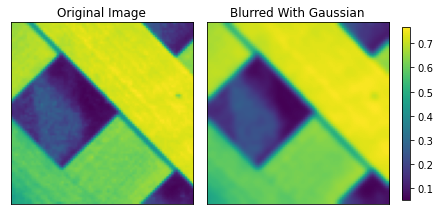

In [23]:
img = mdict["img1"]

blurred_img = cv2.GaussianBlur(img,(5,5),0)

fig1, axs1 = plt.subplots(1, 2, constrained_layout=True)

print_img_subplot(axs1[0], img, "Original Image", False)
im_plt = print_img_subplot(axs1[1], blurred_img, "Blurred With Gaussian", False)

fig1.colorbar(im_plt, ax=axs1, location='right', shrink=0.6)
plt.show()

### Getting Derivative Filters

In [24]:
hx1, hy0 = cv2.getDerivKernels(1,0,3)
hx0, hy1 = cv2.getDerivKernels(0,1,3)
hx2, _ = cv2.getDerivKernels(2,0,3)
_, hy2 = cv2.getDerivKernels(0,2,3)

### Results

In [25]:
res_x1 = cv2.sepFilter2D(blurred_img,-1,hx1,hy0)
res_y1 = cv2.sepFilter2D(blurred_img,-1,hx0,hy1)
res_x2 = cv2.sepFilter2D(blurred_img,-1,hx2,hy0)
res_y2 = cv2.sepFilter2D(blurred_img,-1,hx0,hy2)

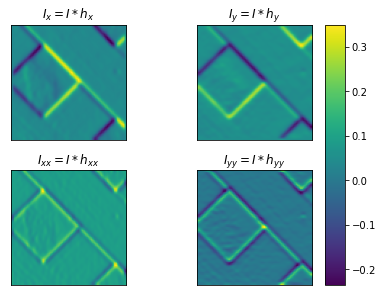

In [26]:
fig2, axs2 = plt.subplots(2, 2, constrained_layout=True)

print_img_subplot(axs2[0,0], res_x1, "$I_x = I * h_x$", False)
print_img_subplot(axs2[0,1], res_y1, "$I_y = I * h_y$", False)
print_img_subplot(axs2[1,0], res_x2, "$I_{xx} = I * h_{xx}$", False)
im_plt = print_img_subplot(axs2[1,1], res_y2, "$I_{yy} = I * h_{yy}$", False)

fig2.colorbar(im_plt, ax=axs2, location='right', shrink=1.0)
plt.show()